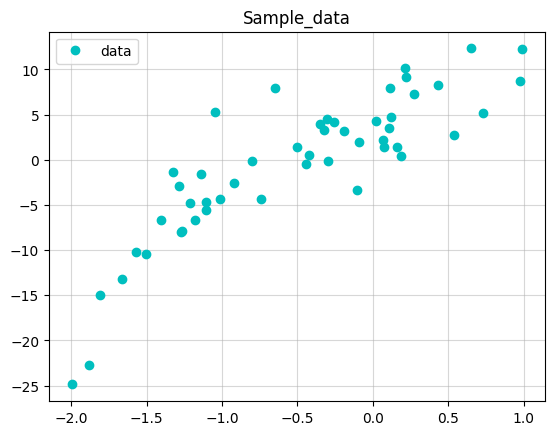

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("data0405.csv", encoding = 'utf-8-sig') 


x = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y']).reshape(-1, 1)


plt.plot(df['x'], df['y'], 'co', label = "data")

plt.title("Sample_data") 
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

In [360]:
print(x.shape, y.shape)
print(np.min(x), np.max(x))
print(np.min(y), np.max(y))


(50, 1) (50, 1)
-1.999 0.992
-24.869 12.309


In [150]:
3 / 0.003

1000.0

In [152]:
xp = np.arange(-2, 1, 0.003).reshape(-1, 1)
xp.shape

(1000, 1)

# 1. 최소제곱법을 이용한 예측 

### 1-1, 선형 예측 모델의 파라미터 값을 구하고, 예측 모델을 그려라.

In [276]:
ls_parameters = dict()

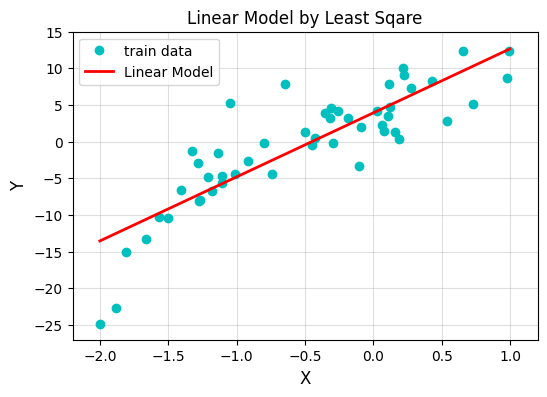

In [324]:
A = np.hstack([x **0 , x]) 
A = np.asmatrix(A) 
w = (A.T * A).I *A.T * y  

ls_parameters[1] = w

yp = xp * w[1,0] + w[0,0]

plt.figure(figsize = (6,4))
plt.title("Linear Model by Least Sqare")
plt.xlabel("X", fontsize=  12) 
plt.ylabel("Y", fontsize = 12) 
plt.plot(x, y, 'co' , label = "train data") 
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear Model") 

plt.legend() 
plt.axis([-2.2, 1.2, -27, 15]) 
plt.grid(alpha = 0.4)
plt.show()


### 1-2. 비선형(2차 및 10차) 예측 모델의 파라미터 값을 구하고, 예측 모델을 그려라

(1000, 3)
(1000, 11)


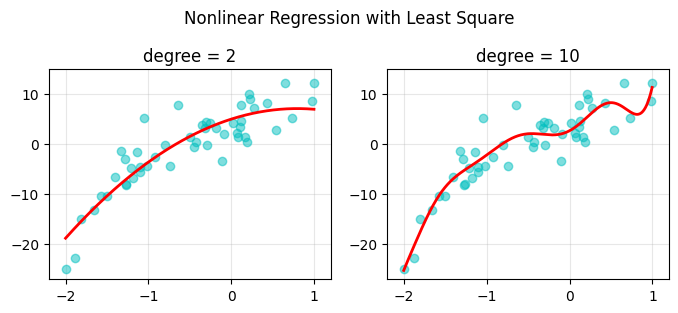

In [326]:
import pdb
d = [2, 10]

plt.figure(figsize = (8, 6))
plt.suptitle("Nonlinear Regression with Least Square", fontsize = 12) 

for i in range(len(d)) : 

    polybasis = np.hstack([xp ** j for j in range(d[i] + 1)])
    polybasis = np.asmatrix(polybasis) 

    print(polybasis.shape)
    
    A = np.hstack([x ** j for j in range(d[i] + 1)])
    A = np.asmatrix(A) 
    # pdb.set_trace()
    w = (A.T * A).I * A.T * y 

    yp = polybasis * w 

    ls_parameters[d[i]] = w

    plt.subplot(2, 2, i + 1) 
    plt.plot(x, y, 'co', alpha = 0.5) 
    plt.plot(xp, yp, 'r', linewidth = 2) 
    plt.axis([-2.2, 1.2, -27, 15]) 
    plt.title("degree = {}".format(d[i]))
    plt.grid(alpha = 0.3)

plt.show()


In [328]:
ls_parameters

{1: matrix([[3.94188011],
         [8.73592461]]),
 2: matrix([[ 5.03906362],
         [ 5.27924916],
         [-3.31676315]]),
 10: matrix([[  2.70561056],
         [  8.74663574],
         [ 24.11081405],
         [ -7.1774006 ],
         [-70.594899  ],
         [-20.12073832],
         [ 59.53548312],
         [ 36.49128213],
         [ -8.88620245],
         [-11.06845302],
         [ -2.15841392]])}

In [330]:
ls_parameters.keys()

dict_keys([1, 2, 10])

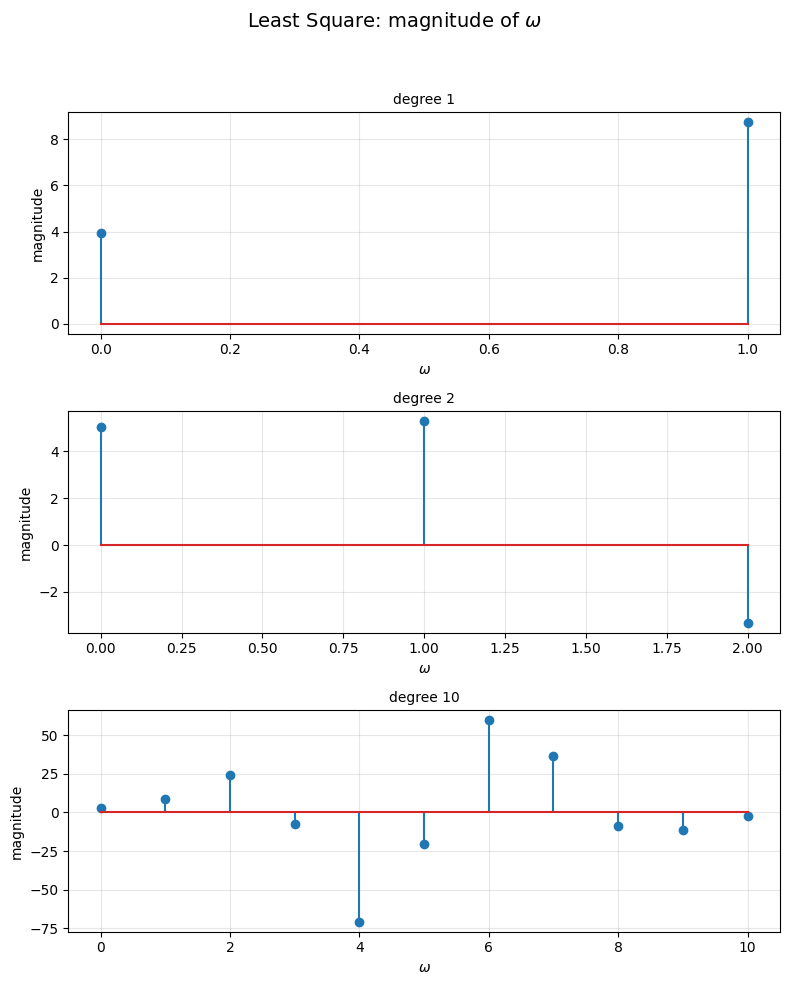

In [332]:
plt.figure(figsize=(8, 10))
plt.suptitle("Least Square: magnitude of $\omega$", fontsize=14)

for c, i in enumerate(ls_parameters.keys(), 1):
    plt.subplot(len(ls_parameters), 1, c)
    plt.title(f'degree {i}', fontsize=10)
    plt.xlabel(r'$\omega$', fontsize=10)
    plt.ylabel('magnitude', fontsize=10)
    plt.stem(np.linspace(0, i, i + 1).reshape(-1, 1), ls_parameters[i])
    plt.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


# 2. 경사하강법을 이용한 예측

In [445]:
gd_parameters = dict()
xp = np.arange(-2, 1, 0.003).reshape(-1, 1)

### 2-1, 선형 예측 모델의 파라미터 값을 구하고, 예측 모델을 그려라.

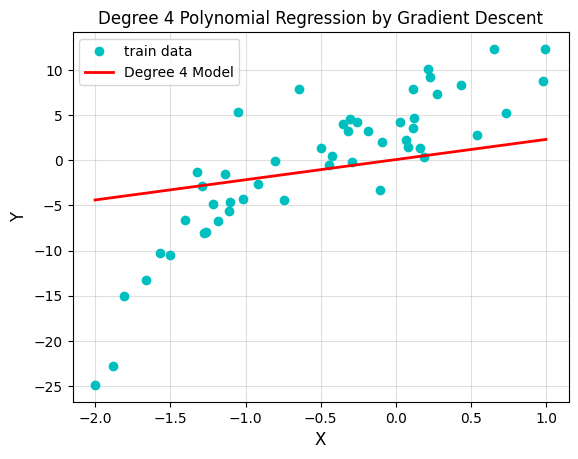

In [448]:
# 하이퍼파라미터
epochs = 500
lrate = 0.001
n = len(y)

# 파라미터 초기화 (스칼라)
w0, w1 = 0, 0

# 경사하강법
for _ in range(epochs): 
    y_pred = w0 + w1 * x 
    
    error = y_pred - y
    
    dw0 = (1/n) * np.sum(error)
    dw1 = (1/n) * np.sum(error * x)

    
    w0 -= lrate * dw0
    w1 -= lrate * dw1



gd_parameters[1] = np.asmatrix([[w0], [w1]])

# 예측 및 시각화

yp = w0 + w1 * xp 

plt.plot(x, y , 'co' , label='train data')
plt.plot(xp, yp, 'r', linewidth=2, label='Degree 4 Model')
plt.title("Degree 4 Polynomial Regression by Gradient Descent") 
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

### 2-2. 비선형(2차 및 4차) 예측 모델의 파라미터 값을 구하고, 예측 모델을 그려라

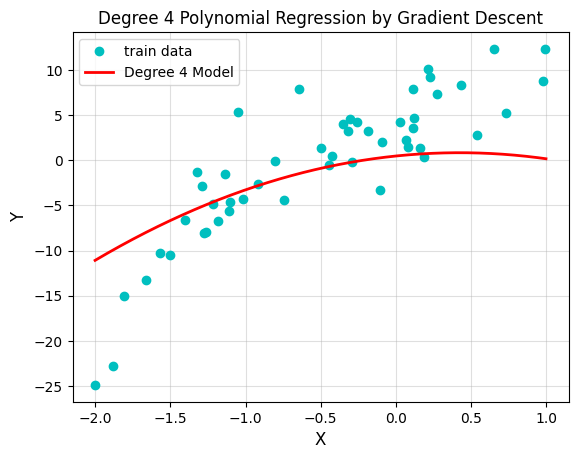

In [451]:
# 하이퍼파라미터
epochs = 500
lrate = 0.001
n = len(y)

# 파라미터 초기화 (스칼라)
w0, w1, w2 = 0, 0, 0

# 경사하강법
for _ in range(epochs): 
    y_pred = w0 + w1 * x + w2 * x**2 
    
    error = y_pred - y
    
    dw0 = (1/n) * np.sum(error)
    dw1 = (1/n) * np.sum(error * x)
    dw2 = (1/n) * np.sum(error * x**2)
    
    w0 -= lrate * dw0
    w1 -= lrate * dw1
    w2 -= lrate * dw2



gd_parameters[2] = np.asmatrix([[w0], [w1], [w2]])

# 예측 및 시각화

yp = w0 + w1 * xp + w2 * xp**2 

plt.plot(x, y , 'co' , label='train data')
plt.plot(xp, yp, 'r', linewidth=2, label='Degree 4 Model')
plt.title("Degree 4 Polynomial Regression by Gradient Descent") 
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

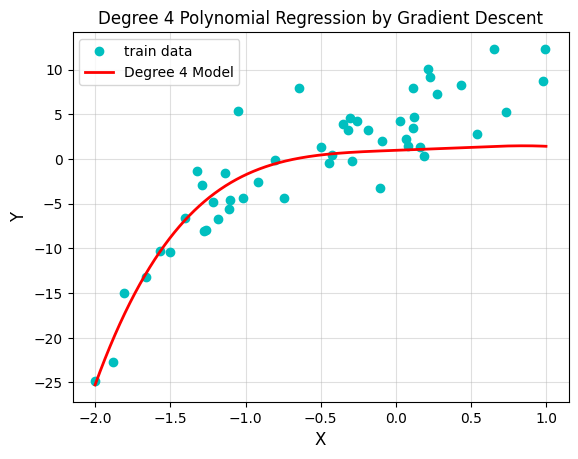

In [453]:
# 하이퍼파라미터
epochs = 500
lrate = 0.001
n = len(y)

# 파라미터 초기화 (스칼라)
w0, w1, w2, w3, w4 = 0, 0, 0, 0, 0

# 경사하강법
for _ in range(epochs): 
    y_pred = w0 + w1 * x + w2 * x**2 + w3 * x**3 + w4 * x**4
    
    error = y_pred - y
    
    dw0 = (1/n) * np.sum(error)
    dw1 = (1/n) * np.sum(error * x)
    dw2 = (1/n) * np.sum(error * x**2)
    dw3 = (1/n) * np.sum(error * x**3)
    dw4 = (1/n) * np.sum(error * x**4)
    
    w0 -= lrate * dw0
    w1 -= lrate * dw1
    w2 -= lrate * dw2
    w3 -= lrate * dw3
    w4 -= lrate * dw4


gd_parameters[4] = np.asmatrix([[w0], [w1], [w2], [w3], [w4]])

# 예측 및 시각화

yp = w0 + w1 * xp + w2 * xp**2 + w3 * xp**3 + w4 * xp**4

plt.plot(x, y , 'co' , label='train data')
plt.plot(xp, yp, 'r', linewidth=2, label='Degree 4 Model')
plt.title("Degree 4 Polynomial Regression by Gradient Descent") 
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

In [455]:
gd_parameters

{1: matrix([[0.06825886],
         [2.23603262]]),
 2: matrix([[ 0.46137619],
         [ 1.71642697],
         [-2.02921761]]),
 4: matrix([[ 0.96730967],
         [ 0.61615766],
         [-0.09587643],
         [ 0.9784752 ],
         [-1.04970844]])}

In [380]:
gd_parameters.keys()

dict_keys([1, 2, 4])

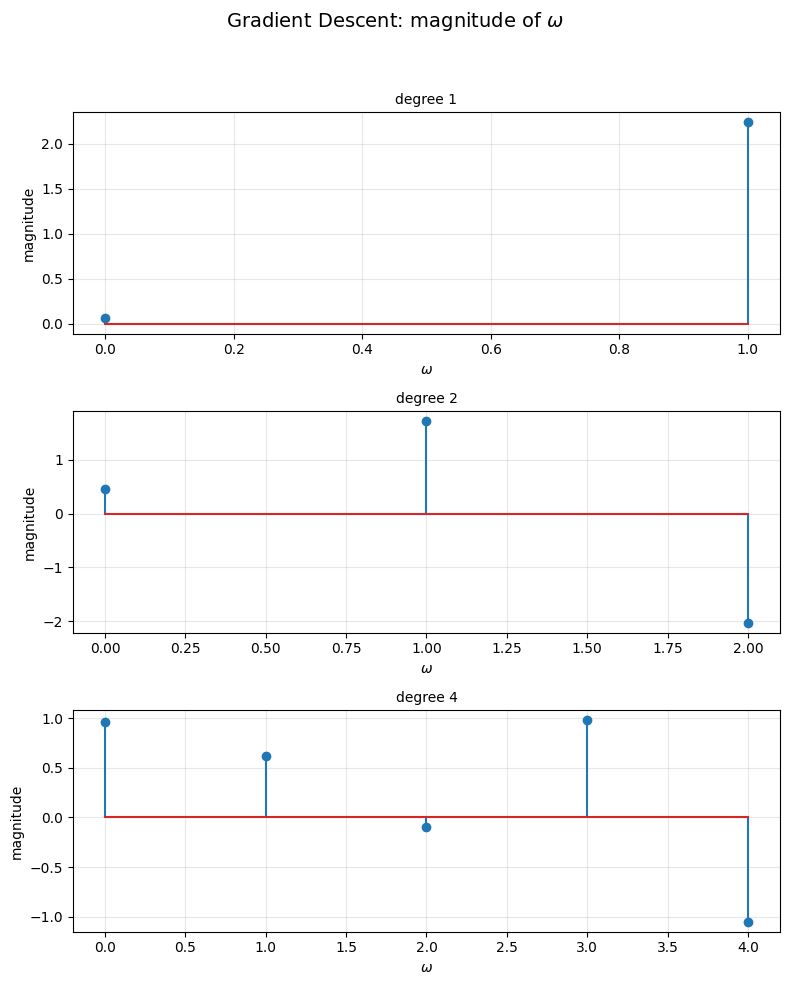

In [408]:
plt.figure(figsize=(8, 10))
plt.suptitle("Gradient Descent: magnitude of $\omega$", fontsize=14)

for c, i in enumerate(gd_parameters.keys(), 1):
    plt.subplot(len(gd_parameters), 1, c)
    plt.title(f'degree {i}', fontsize=10)
    plt.xlabel(r'$\omega$', fontsize=10)
    plt.ylabel('magnitude', fontsize=10)
    plt.stem(np.linspace(0, i, i + 1).reshape(-1, 1), gd_parameters[i])
    plt.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


# 3. 두 방법에 대해 파라미터 값이 어떻게 다른지 비교하라.

In [413]:
ls_parameters

## 최소제곱법 w 값  
## 다항 기저함수 사용
## 입력데이터 차수가 커질 수록 점점 w 값이 커지는 것을 볼 수 있음 

{1: matrix([[3.94188011],
         [8.73592461]]),
 2: matrix([[ 5.03906362],
         [ 5.27924916],
         [-3.31676315]]),
 10: matrix([[  2.70561056],
         [  8.74663574],
         [ 24.11081405],
         [ -7.1774006 ],
         [-70.594899  ],
         [-20.12073832],
         [ 59.53548312],
         [ 36.49128213],
         [ -8.88620245],
         [-11.06845302],
         [ -2.15841392]])}

In [411]:
gd_parameters

## 경사하강법은 최소제곱법에 비해 w 값 증가 폭은 굉장히 작은 편
## 그러나 lrate와 epochs의 영향으로 fitting이 잘 되지 않는 경향을 보임 

{1: matrix([[0.06825886],
         [2.23603262]]),
 2: matrix([[ 0.46137619],
         [ 1.71642697],
         [-2.02921761]]),
 4: matrix([[ 0.96730967],
         [ 0.61615766],
         [-0.09587643],
         [ 0.9784752 ],
         [-1.04970844]])}

###  비선형 4차 예측 모델의 파라미터 값을 epochs > 1000, lrate > 0.01로 조절 후 시도 

In [474]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

0.9673096667549743 0.6161576636419622 -0.0958764333517403 0.9784751987519624 -1.0497084397372785


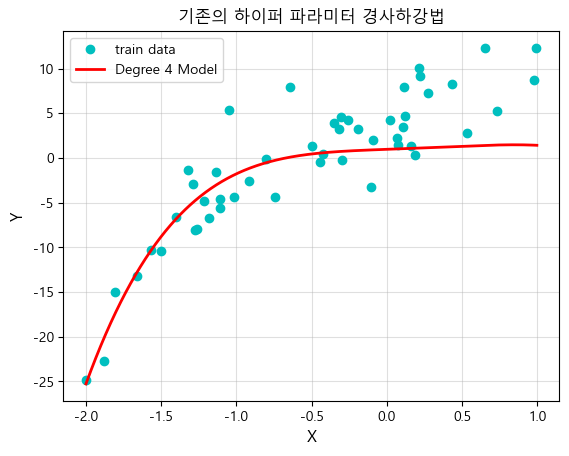

3.7363668536814862 3.4966601760282527 0.8463181273583443 2.576963142289985 -0.2481064425180706


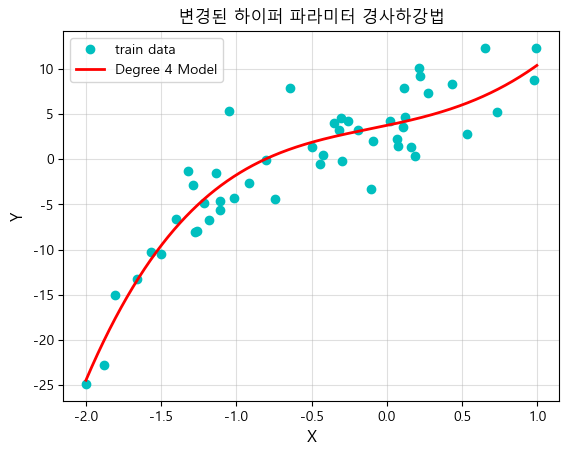

In [476]:
# 하이퍼파라미터 변경전
epochs = 500
lrate = 0.001
n = len(y)

# 파라미터 초기화 (스칼라)
w0, w1, w2, w3, w4 = 0, 0, 0, 0, 0

# 경사하강법
for _ in range(epochs): 
    y_pred = w0 + w1 * x + w2 * x**2 + w3 * x**3 + w4 * x**4
    
    error = y_pred - y
    
    dw0 = (1/n) * np.sum(error)
    dw1 = (1/n) * np.sum(error * x)
    dw2 = (1/n) * np.sum(error * x**2)
    dw3 = (1/n) * np.sum(error * x**3)
    dw4 = (1/n) * np.sum(error * x**4)
    
    w0 -= lrate * dw0
    w1 -= lrate * dw1
    w2 -= lrate * dw2
    w3 -= lrate * dw3
    w4 -= lrate * dw4

print(w0 ,w1, w2, w3, w4)

# 예측 및 시각화

yp = w0 + w1 * xp + w2 * xp**2 + w3 * xp**3 + w4 * xp**4

plt.plot(x, y , 'co' , label='train data')
plt.plot(xp, yp, 'r', linewidth=2, label='Degree 4 Model')
plt.title("기존의 하이퍼 파라미터 경사하강법") 
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

# 하이퍼파라미터 변경
epochs = 1000
lrate = 0.01
n = len(y)

# 파라미터 초기화 (스칼라)
w0, w1, w2, w3, w4 = 0, 0, 0, 0, 0

# 경사하강법
for _ in range(epochs): 
    y_pred = w0 + w1 * x + w2 * x**2 + w3 * x**3 + w4 * x**4
    
    error = y_pred - y
    
    dw0 = (1/n) * np.sum(error)
    dw1 = (1/n) * np.sum(error * x)
    dw2 = (1/n) * np.sum(error * x**2)
    dw3 = (1/n) * np.sum(error * x**3)
    dw4 = (1/n) * np.sum(error * x**4)
    
    w0 -= lrate * dw0
    w1 -= lrate * dw1
    w2 -= lrate * dw2
    w3 -= lrate * dw3
    w4 -= lrate * dw4


print(w0 ,w1, w2, w3, w4)

# 예측 및 시각화

yp = w0 + w1 * xp + w2 * xp**2 + w3 * xp**3 + w4 * xp**4

plt.plot(x, y , 'co' , label='train data')
plt.plot(xp, yp, 'r', linewidth=2, label='Degree 4 Model')
plt.title("변경된 하이퍼 파라미터 경사하강법") 
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

## 하이퍼 파라미터인 learning rate, epcoh을 조절하니 
## 보다 피팅이 더 잘되는 것을 볼 수 있음!